Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [ ]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [ ]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
func= PolynomialFeatures(degree=1)
fi=func.fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [ ]:
from numpy import linalg
#w1=linalg.inv(fi@fi.T)@fi.T@y
w2=linalg.pinv(fi)@y
print(w2)


[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Prava formula koristi 1/N što je realnije nego koristiti 1/2 uvijek.

[2.1999999999999993, 2.6571428571428566, 3.114285714285714, 4.0285714285714285]
4.085714285714286


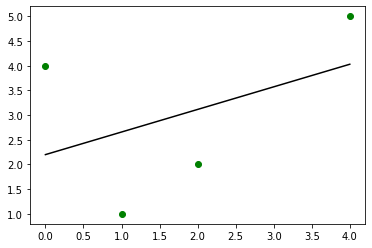

In [ ]:
from sklearn.metrics import mean_squared_error
h=[]
for i in range(len(fi)):
  h.append(w2.T@fi[i])

print(h)
n=4
e=sklearn.metrics.mean_squared_error(y, h)*(n/2)
print(e)  

plt.scatter(X, y,color='g') 
plt.plot(X, h, color='k') 
plt.show()


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

Ne možemo računati zato jer da bi mogli dobiti inverz moramo imati kvadratnu matricu. Preslikavanje u višu dimenziju neće raditi jer ne mođemo dobiti inverz ni iz svih kvadratnih matrica ako su singularne.

In [ ]:
#baca error zbog veličine fi matrice
#wNovi=linalg.inv(fi)@y

#povečanje dimenzije fi
func= PolynomialFeatures(degree=3)
fiPovecan=func.fit_transform(X)
print(fiPovecan)

wNovi=linalg.inv(fiPovecan)@y
print(wNovi)

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

[[0]
 [1]
 [2]
 [4]]
[2.2        0.45714286]
2.2 [0.45714286]
[2.1999999999999993, 2.6571428571428566, 3.114285714285714, 4.0285714285714285]
4.085714285714286 4.085714285714286


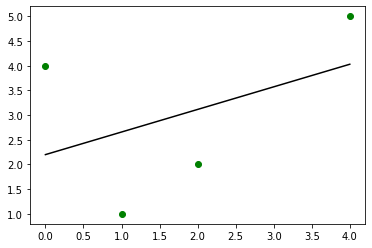

In [ ]:
from sklearn.linear_model import LinearRegression
print(X)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X,y)
wN1=regr.intercept_
wN2=regr.coef_
#tezina od prije
print(w2)
#dobiveno sada
print(wN1, wN2)
print(h)
pred=regr.predict(list(X))
e_new=sklearn.metrics.mean_squared_error(y, pred)*(n/2)
print(e, e_new)

plt.scatter(X, y,color='g') 
plt.plot(X, pred, color='k') 
plt.show()

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [ ]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    y=[]
    for x in X:
      y.append(f(x)+np.random.normal(0, noise))
    return y  

In [ ]:
def make_instances(x1, x2, N) :
  return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [ ]:
func=lambda x:5+x-2*x**2-5*x**3

X=make_instances(-5, 5, 50)

y=make_labels(X, func, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

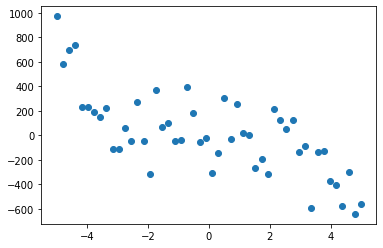

In [ ]:
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

[[-4.79538761]
 [26.23630287]
 [ 1.83172777]
 [-6.82963355]]
878569.6970120531


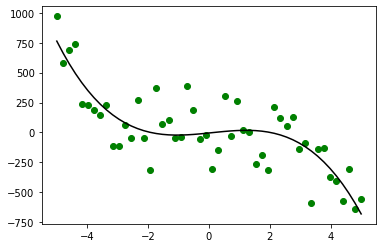

In [ ]:
func= PolynomialFeatures(degree=3)
fi=func.fit_transform(X)

w=linalg.pinv(fi)@y
print(w)

h=[]
for i in range(len(fi)):
  h.append(w.T@fi[i])

n=50
e=sklearn.metrics.mean_squared_error(y, h)*n/2
print(e)  

plt.scatter(X, y,color='g') 
plt.plot(X, h, color='k') 
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Model stupnja 20 jer je funkcija modela najviše prati zadani skup. 

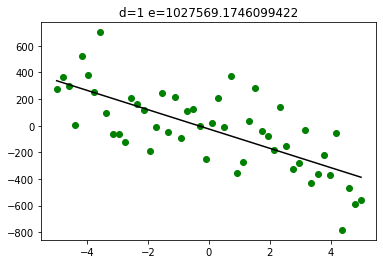

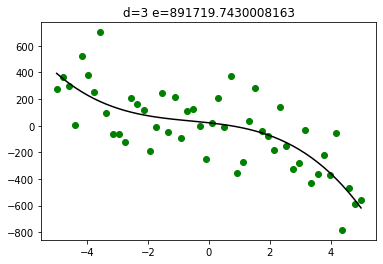

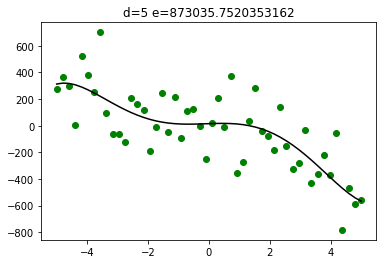

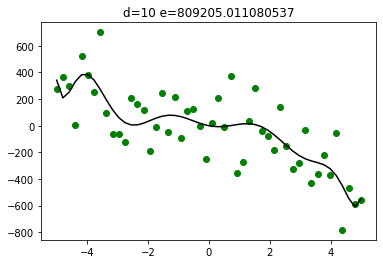

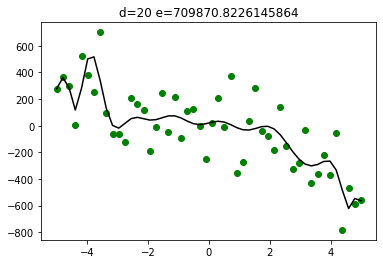

In [ ]:
func=lambda x:5+x-2*x**2-5*x**3
X=make_instances(-5, 5, 50)
y=make_labels(X, func, 200)

for j in (1,3,5,10,20):
  func= PolynomialFeatures(degree=j)
  fi=func.fit_transform(X)
  w=linalg.pinv(fi)@y
  h=[]
  for i in range(len(fi)):
    h.append(w.T@fi[i])
  n=50
  e=sklearn.metrics.mean_squared_error(y, h)*n/2
  plt.scatter(X, y,color='g') 
  plt.plot(X, h, color='k')
  plt.title("d="+str(j)+" e="+str(e)) 
  plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

Očekivao sam da će se pogreška smanjivati povečanjem stupnja na train skupu i da će model s vremenom postati prenaučen te da će se ond apogreška na test skupu povećavati. Odabrao bi model stupnja 3 ili 4 jer oni daju najmanju pogrešku na skupu za testiranje. 

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

Dobiveni primjeri imaju nesumičan šum koji onda utjeće rezultat a tako i na graf. Više primjera ne rješava problem, ali su rezultati za train skup uvijek međusobno slićni.

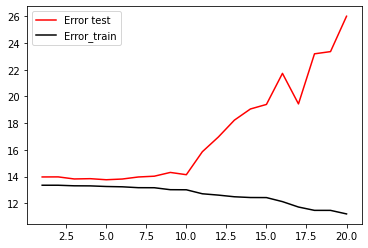

In [ ]:
from sklearn.model_selection import train_test_split

func=lambda x:5+x-2*x**2-5*x**3
X=make_instances(-5, 5, 50)
y=make_labels(X, func, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

e_train=[]
e_test=[]

arr=[]
for j in range(1, 21):
  arr.append(j)
  poly = PolynomialFeatures(degree=j, include_bias=False)
  poly_train = poly.fit_transform(X_train.reshape(-1, 1))
  poly_test = poly.fit_transform(X_test.reshape(-1, 1))

  regr = sklearn.linear_model.LinearRegression()
  regr.fit(poly_train,y_train)
    
  pred_train=regr.predict(poly_train)
  e_train.append(math.log(sklearn.metrics.mean_squared_error(y_train, pred_train)*(n/2)))

  pred_test=regr.predict(poly_test)
  e_test.append(math.log(sklearn.metrics.mean_squared_error(y_test, pred_test)*(n/2)))

plt.plot(arr, e_test, 'r', label="Error test")
plt.plot(arr, e_train, 'k', label="Error_train")
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

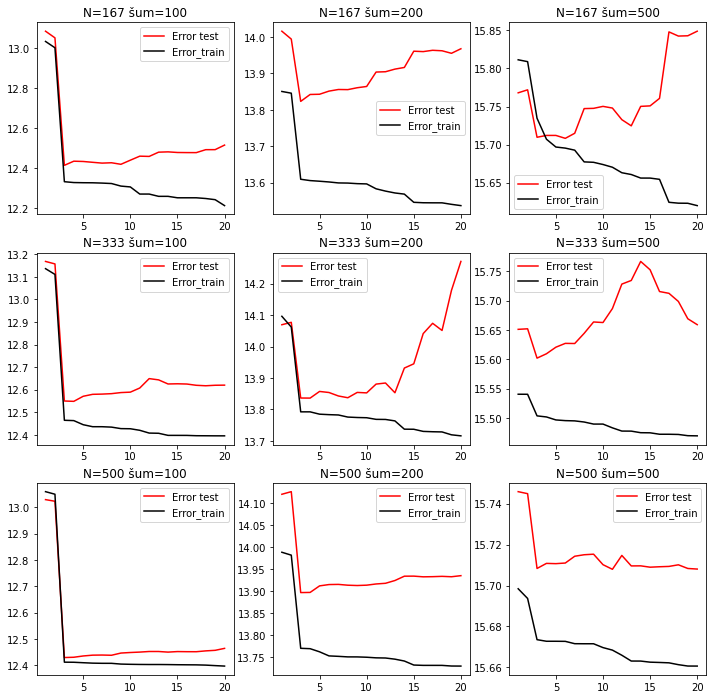

In [ ]:
func=lambda x:5+x-2*x**2-5*x**3

N=1000

X=make_instances(-5, 5, N)
X_train, X_test = train_test_split(X,test_size=0.5, random_state=42)


figure, axis = plt.subplots(3, 3)

for size, a in zip([1/3,2/3, 1], [0, 1,2]):

  X_train_size=X_train[:round(len(X_train)*size)]
  X_test_size=X_test[:round(len(X_test)*size)]

  for sum , b in zip([100, 200, 500], [0,1,2]):
    y_train=make_labels(X_train_size, func, sum)
    y_test=make_labels(X_test_size, func, sum)

    arr=[]
    e_train=[]
    e_test=[]
    for j in range(1, 21):
      arr.append(j)
      
      poly = PolynomialFeatures(degree=j, include_bias=False)
      poly_train = poly.fit_transform(X_train_size.reshape(-1, 1))
      poly_test = poly.fit_transform(X_test_size.reshape(-1, 1))

      regr = sklearn.linear_model.LinearRegression()
      regr.fit(poly_train,y_train)
        
      pred_train=regr.predict(poly_train)
      e_train.append(math.log(sklearn.metrics.mean_squared_error(y_train, pred_train)*(n/2)))

      pred_test=regr.predict(poly_test)
      e_test.append(math.log(sklearn.metrics.mean_squared_error(y_test, pred_test)*(n/2)))

    axis[a, b].plot(arr, e_test, 'r', label="Error test")
    axis[a, b].plot(arr, e_train, 'k', label="Error_train")
    axis[a, b].set_title("N="+str(round(size*N/2))+" šum="+str(sum))
    axis[a, b].legend()
  
figure.set_size_inches(12, 12)
plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

Sa većim skupom vidimo da rezultati teže normalnosti tj. train se približava nuli, a test daje najbolje rezultate kod stupnjeva 3 i 4. Sa povečanjem šuma razlika između pogreške na test i train raste jer su podatci sve više nasumični i razbacani pa ih je teško generalizirati i onda se prenaučenost kažnjava još više.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

4x4

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

S porastom lambde težine se smanjuju što je očekivano jer je to upravo ono čemu regularizacija služi.

In [ ]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

i1=[0,0,0,0]
i2=[0,1,0,0]
i3=[0,0,1,0]
i4=[0,0,0,1]

I= np.vstack([i1,i2, i3, i4 ])

print(I)

from sklearn.preprocessing import PolynomialFeatures
func= PolynomialFeatures(degree=3)
fi=func.fit_transform(X)
print(fi)

for lam in(0, 1, 10):
  w=linalg.inv(fi.T@fi+lam*I)@fi.T@y
  print(w)

[[0 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili. 

Jesu

In [ ]:
from sklearn.linear_model import Ridge

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

func= PolynomialFeatures(degree=3, include_bias=False)
fi=func.fit_transform(X)

for lam in (0, 1, 10):
  reg = Ridge(alpha=lam)
  reg.fit(fi, y)
  print(reg.intercept_, reg.coef_)


3.999999999999986 [-5.91666667  3.375      -0.45833333]
3.0569614512471652 [-0.69079365 -0.2831746   0.1445805 ]
2.494441843122973 [-0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

Regularizirane funkcije daju bolje rezultate to je očekivano. Sa d=2 mala je razlika jer se nema puno toga zagladiti ali sa d=10 vidi se da regularizacija zaglađuje pravac tako da dalje rješenje koje ne izgleda prenaučeno.

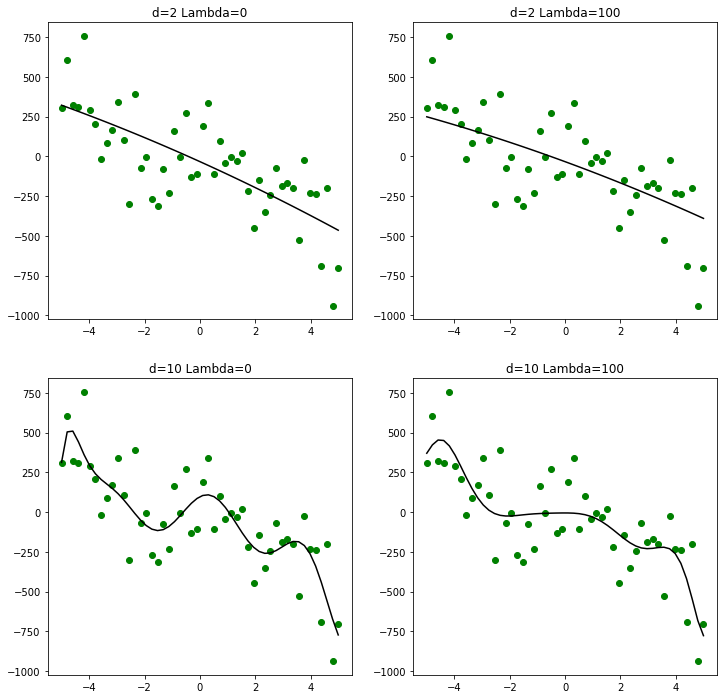

In [ ]:
func=lambda x:5+x-2*x**2-5*x**3
X=make_instances(-5, 5, 50)
y=make_labels(X, func, 200)

figure, axis = plt.subplots(2, 2
                            )
for d, i in zip([2, 10], [0,1]):
  func= PolynomialFeatures(degree=d, include_bias=False)
  fi=func.fit_transform(X)

  for lam, j in zip([0, 100], [0,1]):
    reg = Ridge(alpha=lam)
    reg.fit(fi, y)
    pred=reg.predict(fi)

    axis[i, j].scatter(X, y,color='g') 
    axis[i, j].plot(X, pred, color='k')
    axis[i, j].set_title("d="+str(d)+" Lambda="+str(lam)) 

figure.set_size_inches(12, 12)
plt.show()   

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

Prava pod naučenost se ne javlja niti u jednom trenu jer smo koristili d=10, a s njime smo mogli riskirati samo prenaučenost.

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?
Ovdje 50, ali svakako ćim veći lambda jer s rastom lambde smanjuje s epogreška s vremenom na test skupu.

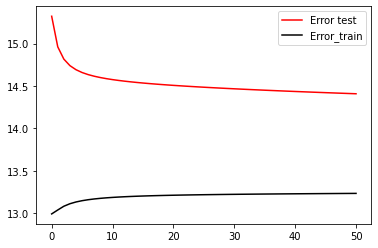

In [ ]:
from sklearn.model_selection import train_test_split

func=lambda x:5+x-2*x**2-5*x**3
X=make_instances(-5, 5, 50)
y=make_labels(X, func, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

e_train=[]
e_test=[]

arr=[]

d=10
for lam in range(51):
  arr.append(lam)
  poly = PolynomialFeatures(degree=d, include_bias=False)
  poly_train = poly.fit_transform(X_train.reshape(-1, 1))
  poly_test = poly.fit_transform(X_test.reshape(-1, 1))

  reg = Ridge(alpha=lam)
  reg.fit(poly_train, y_train)

  pred_train=reg.predict(poly_train)
  e_train.append(math.log(sklearn.metrics.mean_squared_error(y_train, pred_train)*(n/2)))

  pred_test=reg.predict(poly_test)
  e_test.append(math.log(sklearn.metrics.mean_squared_error(y_test, pred_test)*(n/2)))

plt.plot(arr, e_test, 'r', label="Error test")
plt.plot(arr, e_train, 'k', label="Error_train")
plt.legend()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [ ]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

Neće nikada doći do 0 jer norma minimalno iznosi jedan i sa povećanjem lambde i L1 i L2 teže prema 1. Nije problem jer sa težinama čije su sve norme 0 nebi mogli trenirati model.

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak? 

Nijedna tezina nije jednaka 0.

[[-6.15858625 -3.95440142 -2.57158772 -0.09116815 -0.12004575]]
1
6.158586250791678
7.758947169386462


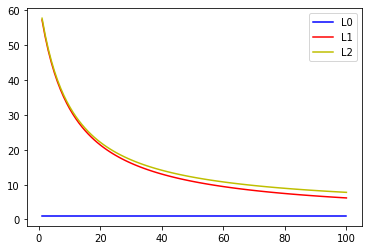

In [ ]:
#l0 je func gor
#l1 je obicna
#l2 je ridge

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

func=lambda x:5+x-2*x**2-5*x**3
X=make_instances(-5, 5, 50)
y=make_labels(X, func, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

arr=[]
d=5

l0_norms=[]
l1_norms=[]
l2_norms=[]

for lam in range(1, 101):
  arr.append(lam)

  poly = PolynomialFeatures(degree=d, include_bias=False)
  poly_train = poly.fit_transform(X_train.reshape(-1, 1))
  poly_test = poly.fit_transform(X_test.reshape(-1, 1))

  reg_l2 = Ridge(alpha=lam)
  reg_l2.fit(poly_train, y_train)

  l0_norms.append(nonzeroes(reg_l2.coef_))
  l1_norms.append(np.linalg.norm(reg_l2.coef_, 1))
  l2_norms.append(np.linalg.norm(reg_l2.coef_, 2))


  if lam==100:
    print(reg_l2.coef_)
    print(nonzeroes(reg_l2.coef_))
    print(np.linalg.norm(reg_l2.coef_, 1))
    print(np.linalg.norm(reg_l2.coef_, 2))

plt.plot(arr, l0_norms, 'b', label="L0")
plt.plot(arr, l1_norms, 'r', label="L1")
plt.plot(arr, l2_norms, 'y', label="L2")
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

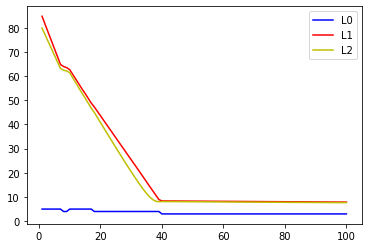

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

func=lambda x:5+x-2*x**2-5*x**3
X=make_instances(-5, 5, 50)
y=make_labels(X, func, 200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

arr=[]
d=5

l0_norms=[]
l1_norms=[]
l2_norms=[]

for lam in range(1, 101):
  arr.append(lam)

  poly = PolynomialFeatures(degree=d, include_bias=False)
  poly_train = poly.fit_transform(X_train.reshape(-1, 1))
  poly_test = poly.fit_transform(X_test.reshape(-1, 1))

  reg_l1 = Lasso(alpha=lam)
  reg_l1.fit(poly_train, y_train)

  l0_norms.append(nonzeroes(reg_l1.coef_))
  l1_norms.append(np.linalg.norm(reg_l1.coef_, 1))
  l2_norms.append(np.linalg.norm(reg_l1.coef_, 2))

plt.plot(arr, l0_norms, 'b', label="L0")
plt.plot(arr, l1_norms, 'r', label="L1")
plt.plot(arr, l2_norms, 'y', label="L2")
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [ ]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

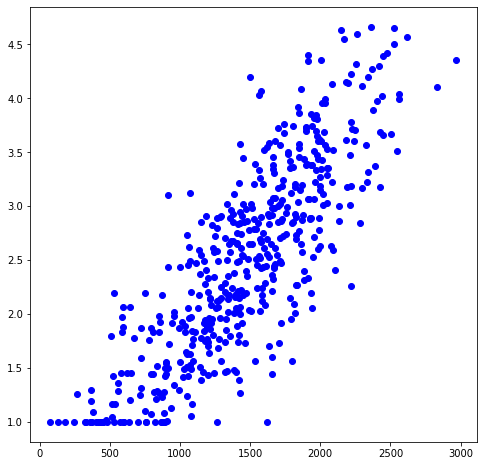

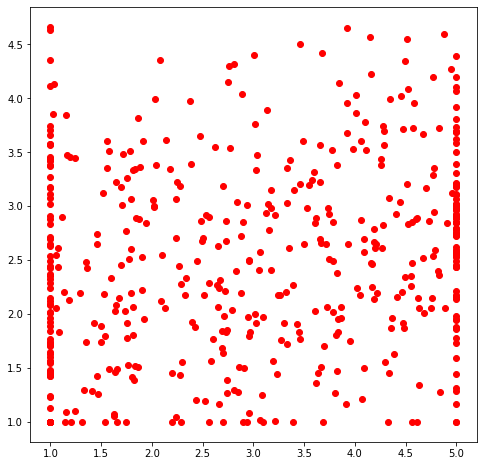

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.scatter(exam_score, grades_y,color = 'blue')
plt.show()

plt.scatter(grade_in_highschool, grades_y,color = 'red')
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [ ]:
reg= Ridge(alpha=0.01)
reg.fit(grades_X, grades_y)
print(reg.intercept_, reg.coef_)

0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

grades_X_fixed=scaler.fit_transform(grades_X)
grades_y_fixed=scaler.fit_transform(grades_y.reshape(-1,1))

reg= Ridge(alpha=0.01)
reg.fit(grades_X_fixed, grades_y_fixed)
print(reg.intercept_, reg.coef_)

[8.62551331e-17] [[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

Po grafovima izgleda da bodovi na prijemnom ispitu imaju veći utjecaj, jer je vidljiva linearnost u grafu, a ne razbacanost ko u grafu ocjena. To je vidljivo i u težinama nnad skupom koji je scale-an.

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [ ]:
grades_X_fixed_colinear=[]

for row in grades_X_fixed:
  grades_X_fixed_colinear.append([row[0], row[1], row[1]])

print(grades_X_fixed_colinear)

[[0.9506381669979933, -0.7860786879284369, -0.7860786879284369], [-0.5034343407373802, -0.5019300402599202, -0.5019300402599202], [1.1859683228551656, -0.5221317160696893, -0.5221317160696893], [-0.5015210874377285, 1.0066446470441839, 1.0066446470441839], [-1.4543212306643285, 1.0765754499499638, 1.0765754499499638], [0.45510556238817523, 1.3746396191011412, 1.3746396191011412], [1.2280598954475055, 0.0317053749937104, 0.0317053749937104], [1.08456589797362, 1.3746396191011412, 1.3746396191011412], [0.8894140614091355, 1.1050212381148732, 1.1050212381148732], [0.7344405441373392, -0.16407722052520912, -0.16407722052520912], [-0.1399162138035369, -1.3840766898372587, -1.3840766898372587], [-0.4249909554516562, 0.5536921342747972, 0.5536921342747972], [-0.7291982300962936, -0.9542445544176477, -0.9542445544176477], [1.2031876025520318, 1.232923425649805, 1.232923425649805], [-1.1960320352113345, -0.808989111852936, -0.808989111852936], [-0.044253548820946516, -0.7592951886241343, -0.759

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [ ]:
reg= Ridge(alpha=0.01)
reg.fit(grades_X_fixed_colinear, grades_y)
print(reg.intercept_, reg.coef_)

2.5030316359918503 [0.73954673 0.06870839 0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

Iznos im se povečao i pojavila se još jedna težina iste vrijednosti ko zadnja.

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
from IPython.utils.path import random
import statistics

w1=[]
w2=[]



for i in range(10):
  grades_X_rand=random.choices(grades_X_fixed_colinear, k=round(len(grades_X_fixed_colinear)/2))
  grades_y_rand=random.choices(grades_y, k=round(len(grades_y)/2))


  reg1= Ridge(alpha=0.01)
  reg1.fit(grades_X_rand, grades_y_rand)
  w1.append(reg1.coef_)


  reg2= Ridge(alpha=1000)
  reg2.fit(grades_X_rand, grades_y_rand)
  w2.append(reg2.coef_)

print(w1)
print()
print(w2)
print()


for i in range(3):

  pom1=[]
  pom2=[]
  for j in range(10):
    pom1.append(w1[j][i])
    pom2.append(w2[j][i])

  print("Lambda 0.01, tezina "+ str(i+1)+"="+str(statistics.stdev(pom1)))  
  print("Lambda 1000, tezina "+ str(i+1)+"="+str(statistics.stdev(pom2)))


[array([ 0.03602704, -0.00711122, -0.00711122]), array([-0.00230365,  0.00698162,  0.00698162]), array([ 0.12249666, -0.01634902, -0.01634902]), array([-0.16718298,  0.01408228,  0.01408228]), array([ 0.04807516, -0.03148543, -0.03148543]), array([-0.10442433,  0.08531983,  0.08531983]), array([0.03543124, 0.06706557, 0.06706557]), array([ 0.06894645, -0.0206274 , -0.0206274 ]), array([-0.03778553,  0.05165325,  0.05165325]), array([0.01618461, 0.04647185, 0.04647185])]

[array([ 0.00632225, -0.00196137, -0.00196137]), array([-0.0001251,  0.0021526,  0.0021526]), array([ 0.02473448, -0.00513033, -0.00513033]), array([-0.03363984,  0.00140586,  0.00140586]), array([ 0.00751987, -0.00945021, -0.00945021]), array([-0.01678315,  0.02693921,  0.02693921]), array([0.01037818, 0.02251545, 0.02251545]), array([ 0.01333535, -0.00626731, -0.00626731]), array([-0.00607506,  0.01733875,  0.01733875]), array([0.00381925, 0.01607895, 0.01607895])]

Lambda 0.01, tezina 1=0.08508117273863622
Lambda 10

**Q:** Kako regularizacija utječe na stabilnost težina?  
Povečavanjem lambde smanjuje se standardna devijacija što znači da su težine stabilnije.

**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

Za lambda=0.01 jesu je je korišten isti alfa i osim nasumičnosti nema velikih razlika. Do promjene dolazi kod lambda=1000 zbog promjene koeficijenta i vidimo da su težine manje. 